# Convergent Learning: Do different neural networks learn the same representations?

This IPython Notebook contains source code necessary to reproduce the results presented in the following paper:

```
@inproceedings{li_2016_ICLR
  title={Convergent Learning: Do different neural networks learn the same representations?},
  author={Li, Yixuan and Yosinski, Jason and Clune, Jeff and Lipson, Hod and Hopcroft, John},
  booktitle={International Conference on Learning Representation (ICLR '16)},
  year={2016}
}
```

## Import libs and functions

In [67]:
from load_data import *
from plotting import *
from pylab import *
from match_unit import *
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Download data necessary to reproduce the experimental results

In [87]:
# URL to download
# TO BE ADDED

## Load data for all nets in group

In [4]:
# End with slash
net_dirs = [
    'net0',
    'net1',
    'net2',
    'net3',
    ]
net_paths = ['../data/' + dd for dd in net_dirs]

In [7]:
# All the layers in Alex Net
layers=['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']

# Load activation mean values, covariance matrices and self-correlation matrices for all the nets, all layers
l_means, l_outers, l_cors = dict(), dict(), dict()
for layer in layers:
    means,outers,cors = [], [], []
    for net_path in net_paths:
        moc = read_val_single_moc(net_path, layer)
        means.append(moc[0])
        outers.append(moc[1])
        cors.append(moc[2])
    l_means[layer] = means
    l_outers[layer] = outers
    l_cors[layer] = cors

In [8]:
# Load cross-correlation matrices for all pair of nets, all layers
l_xcors = {}
for layer in layers:
    l_xcors[layer] = {}
    for net0 in range(len(net_dirs)-1):
        l_xcors[layer][net0] = {}
        for net1 in range(net0+1, len(net_dirs)):
            # To make life simpler, symlinks are all in first net_path directory!
            combo = '%d%d' % (net0, net1)
            l_xcors[layer][net0][net1] = read_val_double_cors(net_paths[0], layer, combo)
            #print 'l_xcors[%s][%d][%d] = %s' % (layer, net0, net1, l_xcors[layer][net0][net1].shape)

## Plot unit mean activations
Below we show the mean activations for each unit of four networks, plotted in sorted order from highest to lowest. First and most saliently, we see a pattern of widely varying mean activation values across units, with a gap between the most active and least active units of one or two orders of magnitude (depending on the layer). Second, we observe a rough overall correspondence in the spectrum of activations between the networks. However, the correspondence is not perfect: although much of the spectrum matches well, the most active filters converged to solutions of somewhat different magnitudes. For example, the average activation value of the filter on conv2 with the highest average activation varies between 49 to 120 over the four networks; the range for conv1 was 98 to 130.13 This effect is more interesting considering that all filters were learned with constant weight decay, which pushes all individual filter weights and biases (and thus subsequent activations) toward zero with the same force.

In [9]:
netidxs = range(4)

In [10]:
def plot_means(layer, do_legend = True, light = False, fileout=None):
    figsize(12,6)
    for ii,idx in enumerate(netidxs):
        rr = ii/(len(netidxs)-1+1e-6)
        clr = (1, .8*rr, 0)
        dat = -np.sort(-l_means[layer][idx])
        if light:
            rcParams.update({'font.size': 22})
            plot(dat, '-', color=clr, lw=3)
            plot(0, dat[0], 'o', color=clr, ms=12)
            plot(len(dat), dat[-1], 'o', color=clr, ms=12)
        else:
            rcParams.update({'font.size': 16})
            plot(dat, 'o-', color=clr, lw=2, ms=9)
    axis('tight')
    ax = looser(axis(), .01, .02)
    axis(ax[0:2] + (min(ax[2],0),) + ax[3:4])
    if do_legend:
        legend(('Net1', 'Net2', 'Net3', 'Net4'))
    if not light:
        xlabel('Channel number (sorted)')
        ylabel('Mean activation')
    title(layer)
    if fileout:
        savefig(fileout + '.pdf')
        savefig(fileout + '.png')

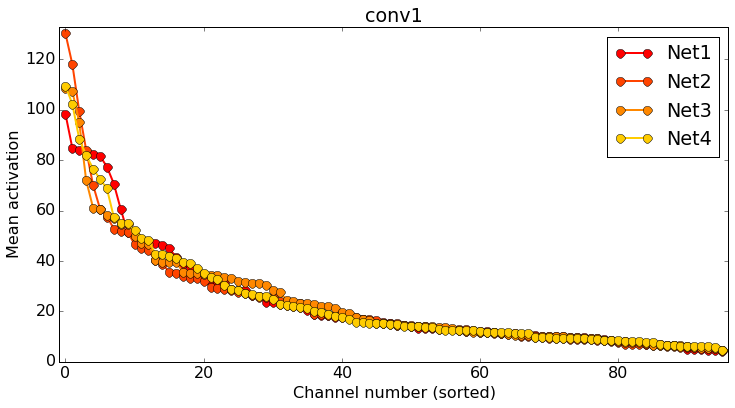

In [11]:
# Conv1 layer
plot_means('conv1', True, False)

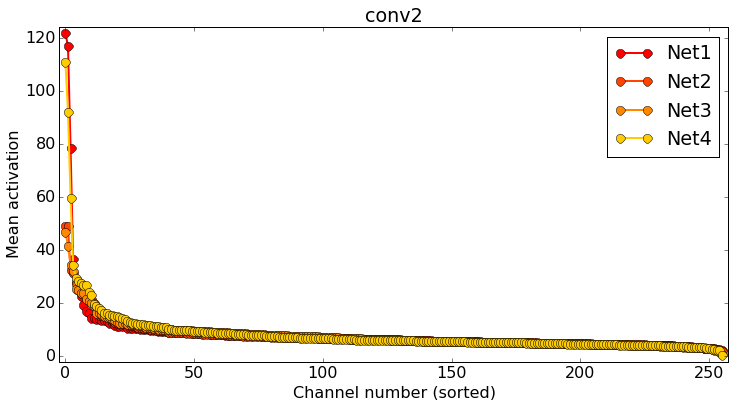

In [12]:
# Conv2 layer
plot_means('conv2', True, False)

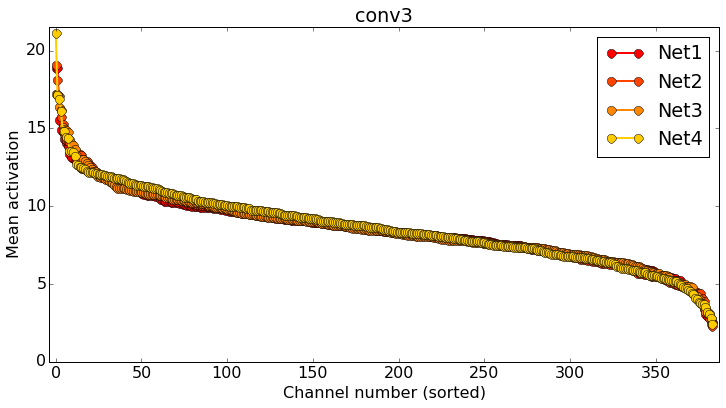

In [62]:
# Conv3 layer
plot_means('conv3', True, False)

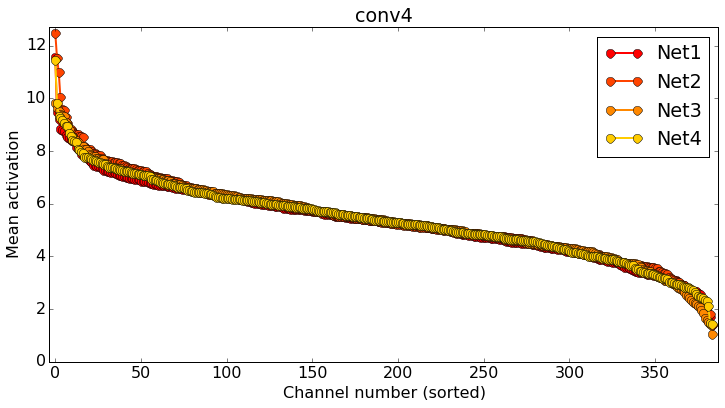

In [63]:
# Conv4 layer
plot_means('conv4', True, False)

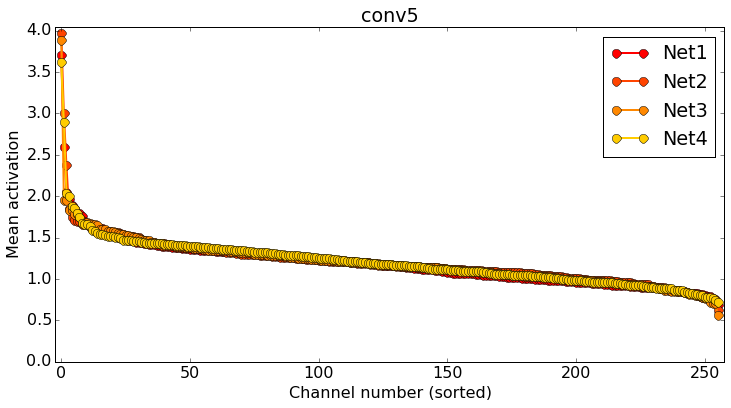

In [64]:
# Conv5 layer
plot_means('conv5', True, False)

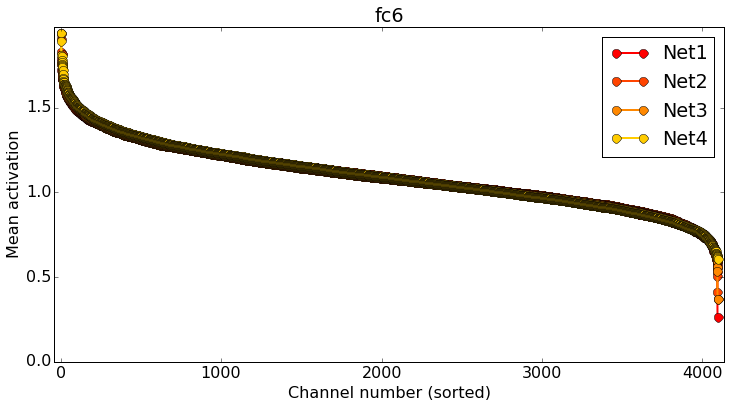

In [65]:
# Fc6 layer
plot_means('fc6', True, False)

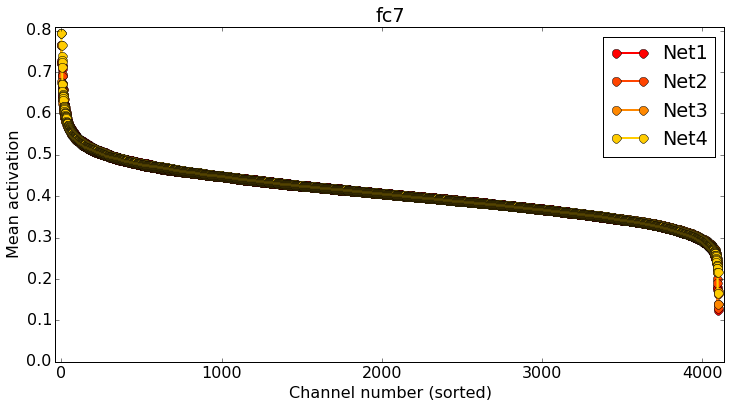

In [66]:
# Fc7 layer
plot_means('fc7', True, False)

## Plot correlation matrices

In [58]:
net0 = 0
net1 = 1
layer = 'conv1'
means, outers, cors = l_means[layer], l_outers[layer], l_cors[layer]

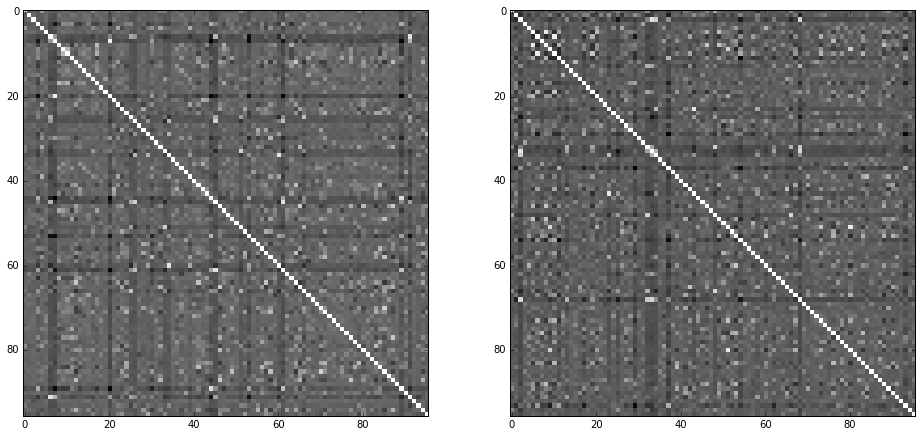

In [59]:
# Plot the within-net correlation matrices of net0 and net1 (conv1 layer). 
# See Fig 1 (a)(b) in http://arxiv.org/pdf/1511.07543v2.pdf
figsize(16,8)
subplot(1,2,1)
showimagesc(cors[net0])
subplot(1,2,2)
showimagesc(cors[net1])

In [60]:
# Find max bipartite matching of between-net correlation matrix
match_no_diag = max_match_order(l_xcors["conv1"][0][1])
loop_order, loop_len = follow_loops(match_no_diag)

After   0 objects hashed, hash is da39
    After   1 objects hashed, hash is 71f3 (latest <type 'numpy.ndarray'>)
After   2 objects hashed, hash is 71f3 (latest <type 'tuple'>)
After   3 objects hashed, hash is f322 (latest <type 'dict'>)
 -> cache.py: max_match_order: trying to load file /home/yli24/.pycache/f3/f322fb10a9089222.max_match_order.pkl.gz
 -> cache.py: max_match_order: cache hit (0.0004s hash overhead, 0.0014s to load, saved 10.5683s)
   -> loaded /home/yli24/.pycache/f3/f322fb10a9089222.max_match_order.pkl.gz


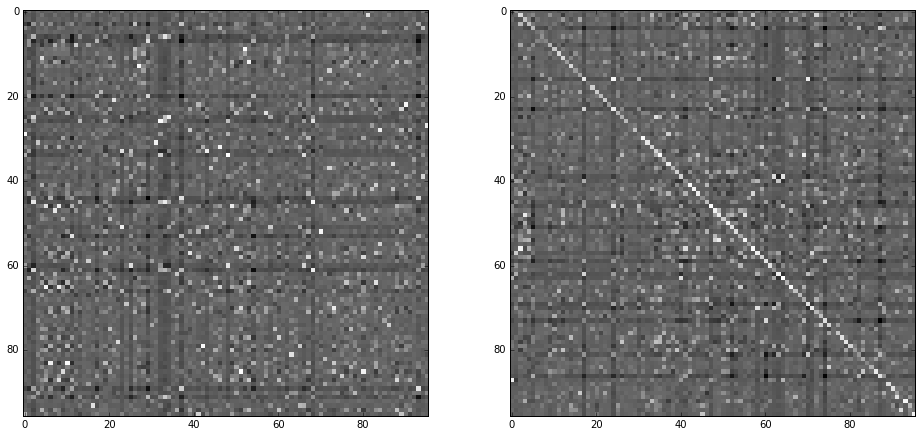

In [61]:
# Between-net correlation for Net1 vs. Net2. 
figsize(16,8)
subplot(1,2,1)
showimagesc(l_xcors["conv1"][0][1])
subplot(1,2,2)
showimagesc(permute_matrix(l_xcors["conv1"][0][1],loop_order))

## Load feature visualizations

In [14]:
vis_layer_net0 = vis_for_layer(net_paths[net0], layer)
vis_layer_net1 = vis_for_layer(net_paths[net1], layer)

In [15]:
# Load unit visualization
l_vis_unit_all = {}
for ll in ['conv1', 'conv2', 'conv3','conv4','conv5']:
    print 'loading vis for layer', ll
    l_vis_unit_all[ll] = {}
    for idx in netidxs:
        l_vis_unit_all[ll][idx] = [stacked_vis_for_unit(net_paths[idx], ll, uu) for uu in range(l_means[ll][idx].shape[0])]

loading vis for layer conv1
loading vis for layer conv2
loading vis for layer conv3
loading vis for layer conv4
loading vis for layer conv5


In [18]:
l_descending_means = {}
for ll in layers:
    l_descending_means[ll] = {}
    for idx in netidxs:
        l_descending_means[ll][idx] = (-l_means[ll][idx]).argsort()

## One-to-one alignment between features learned by different neural networks

### Alignment via correlation - greedy matching
In greedy matching, for each unit in the first net, we find the unit in the second net with maximum correlation to it, which is the max along each row in the between-net correlation matrix.

For all layers visualized, (1) the most correlated filters are near perfect matches, showing that many similar features are learned by independently trained neural networks, and (2) the least correlated features show that many features are learned by one network and are not learned by the other network, at least not by a single neuron in the other network. 

In [56]:
def plot_top_bot_matches(layer, xcor, top = True, fileout = None, crop=True):
    if crop: 
        figsize(15,3.5)
    else:
        figsize(15,7)
    
        
    fig=gcf()
    #fig.set_facecolor((.5,.5,.5))
    
    order = (-xcor.max(1)).argsort()
    #print order 
    N = 8
    for kk in range(N):
        if top:
            unit_ii = order[kk]
        else:
            unit_ii = order[kk-N]
        unit_jj = xcor[unit_ii].argmax()
        subplot(2, N, kk+1)
        if crop:
            imshow(crop_one_patch(l_vis_unit_all[layer][net0][unit_ii]))
        else:
            imshow(l_vis_unit_all[layer][net0][unit_ii])
        axis('off')
        title('%.2f' % xcor[unit_ii,unit_jj])
        
        subplot(2, N, N+kk+1)
        if crop:
            imshow(crop_one_patch(l_vis_unit_all[layer][net1][unit_jj]))
        else:
            imshow(l_vis_unit_all[layer][net1][unit_jj])
        axis('off')
    subplots_adjust(wspace=0.05, hspace=.05)
    if fileout:
        savefig(fileout + '.png',dpi=200)
        savefig(fileout + '.pdf',dpi=200)

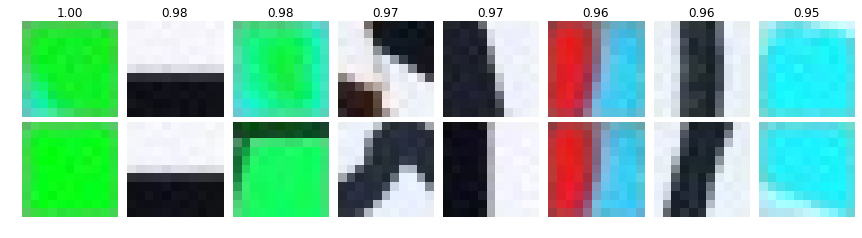

In [57]:
# Conv1, best match
plot_top_bot_matches('conv1', l_xcors['conv1'][net0][net1], True)

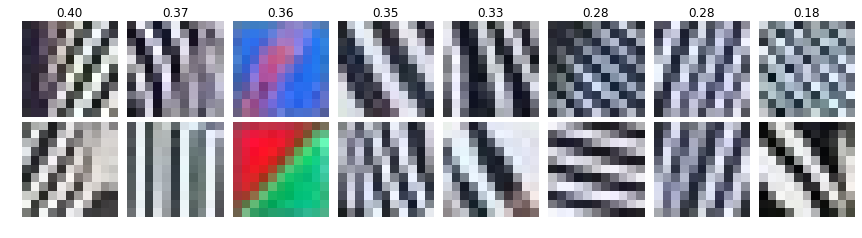

In [51]:
# Conv1, worst match
plot_top_bot_matches('conv1', l_xcors['conv1'][net0][net1], False)

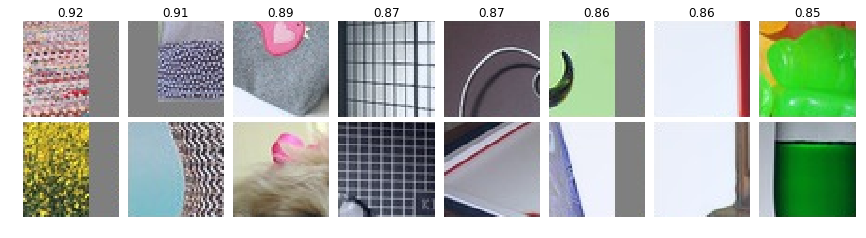

In [52]:
# Conv2, best match
plot_top_bot_matches('conv2', l_xcors['conv2'][net0][net1], True)

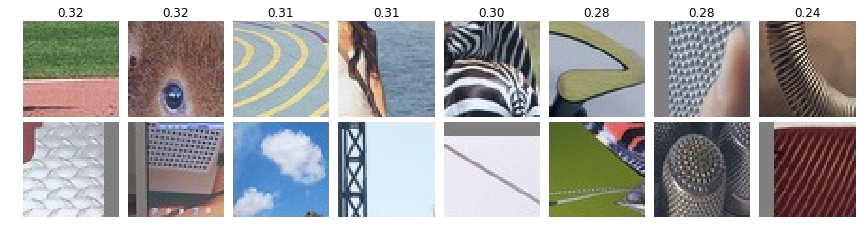

In [53]:
# Conv2, worst match
plot_top_bot_matches('conv2', l_xcors['conv2'][net0][net1], False)

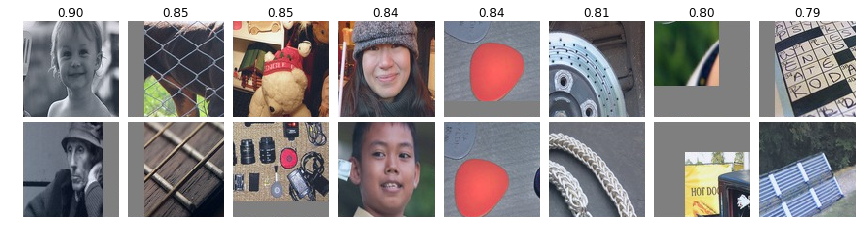

In [47]:
# Conv3, best match
plot_top_bot_matches('conv3', l_xcors['conv3'][net0][net1], True)

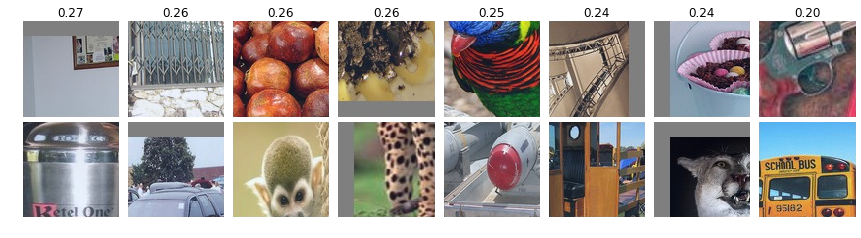

In [48]:
# Conv3, worst match
plot_top_bot_matches('conv3', l_xcors['conv3'][net0][net1], False)

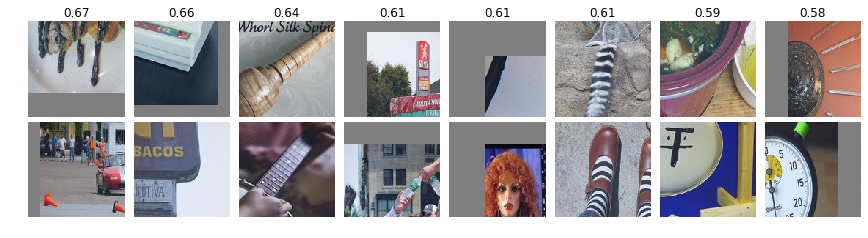

In [49]:
# Conv4, best match
plot_top_bot_matches('conv4', l_xcors['conv4'][net0][net1], True)

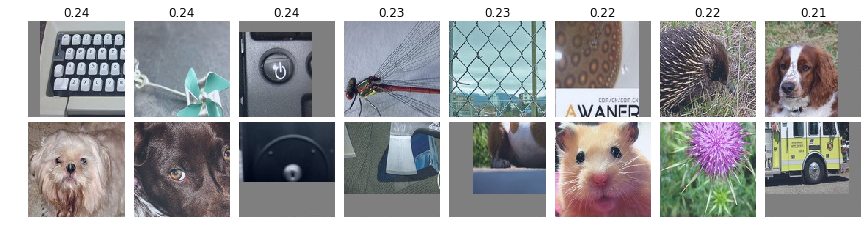

In [50]:
# Conv4, worst match
plot_top_bot_matches('conv4', l_xcors['conv4'][net0][net1], False)

### Alignment via mutual information
Because correlation is a relatively simple mathematical metric that may miss some forms of sta- tistical dependence, we also performed one-to-one alignments of neurons by measuring the mutual information between them. Mutual information measures how much knowledge one gains about one variable by knowing the value of another.

We apply the same matching technique (greedy matching) to the between-net mutual information matrix, and compare the highest and lowest mutual information matches to those obtained above via correlation. The results are qualitatively the same. For example, seven out of eight best matched pairs in the conv1 layer stay the same. These results suggest that correlation is an adequate measurement of the similarity between two neurons, and that switching to a mu- tual information metric would not qualitatively change the correlation-based conclusions presented above.

See Fig S4 in http://arxiv.org/pdf/1511.07543v2.pdf

In [83]:
# Here we only consider the mutual information matrices between net0 and net1, focusing on conv1 and conv2 layers
conv1_mi = np.load(net_paths[0]+"/val_mi_01/"+"conv1_final.pkl")
conv2_mi = np.load(net_paths[0]+"/val_mi_01/"+"conv2_final.pkl")

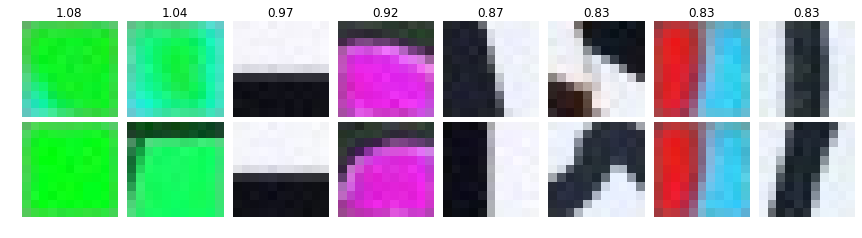

In [76]:
# Conv1, best match
plot_top_bot_matches('conv1', conv1_mi, True)

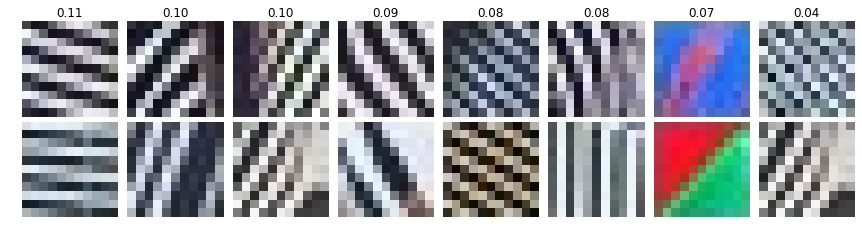

In [77]:
# Conv1, worsr match
plot_top_bot_matches('conv1', conv1_mi, False)

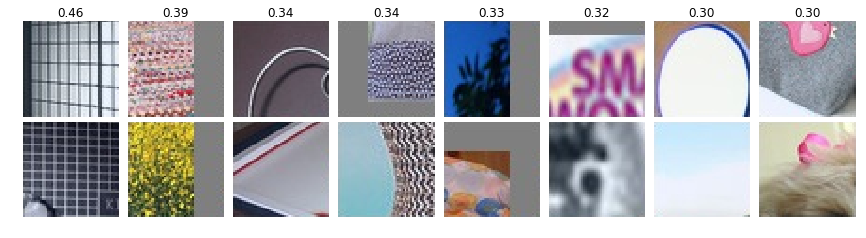

In [82]:
# Conv2, best match
plot_top_bot_matches('conv2', conv2_mi, True)

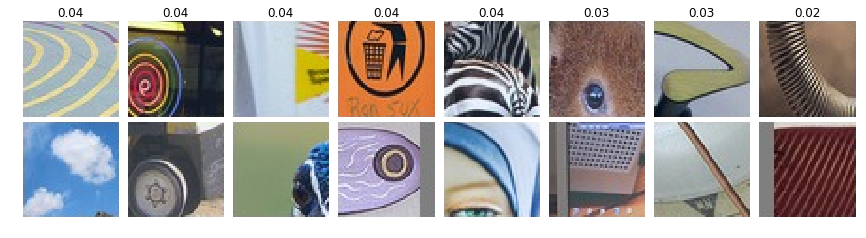

In [84]:
# Conv2, worst match
plot_top_bot_matches('conv2', conv2_mi, False)

## Greedy matching vs. max matching
Below we show comparisons of assignments produced by the greedy matching and max bipartite matching methods for the conv1-conv5 layers.

In [91]:
def plot_match_vs_max(match, xcor, fileout = None):
    figsize(15,6)
    rcParams.update({'font.size': 18})

    match_vals = xcor[arange(xcor.shape[0]),match]
    diag_order = (-xcor.max(1)).argsort()
    
    hmax,=plot(xcor[diag_order,:].max(1), 'o-', color=(.21/.84,.84/.84,.57/.84), lw=2, ms=10)
    hmatch,=plot(match_vals[diag_order], 'o-', color=(0,.45,.25), lw=2, ms=5)
    print "Avg. correlation (greedy matching)",xcor[diag_order,:].max(1).mean()
    print "Avg. correlation (max matching)",match_vals[diag_order].mean()
    count = 0.0
    for i in range(len(match_vals[diag_order])):
        if xcor[diag_order,:].max(1)[i] == match_vals[diag_order][i]:
            count += 1
    print "Overlapping ratio (when greedy matching and max matching returns the same result):",count / len(match_vals[diag_order])
    xlabel('unit index (sorted by correlation of greedy max assignment)')
    ylabel('correlation with assigned unit')
    #_=title('Match correlation high to low')
    
    axis('tight')
    ax = looser(axis(), .015, .03)
    axis(ax[0:2] + (min(ax[2],0),) + ax[3:4])
    #legend(('Net1', 'Net2'), position='best')
    legend((hmax,hmatch), ('greedy match assignment', 'max match assignment'), loc=3)
    if fileout:
        savefig(fileout + '.pdf')
        savefig(fileout + '.png')

In [89]:
print 'net0/net1 are', net0, net1
l_matches = {}
for ll in ['conv1','conv2','conv3','conv4','conv5']:
    l_matches[ll] = max_match_order(l_xcors[ll][net0][net1], ignore_diag=False)

net0/net1 are 0 1
After   0 objects hashed, hash is da39
    After   1 objects hashed, hash is 71f3 (latest <type 'numpy.ndarray'>)
After   2 objects hashed, hash is 71f3 (latest <type 'tuple'>)
    After   3 objects hashed, hash is 7161 (latest <type 'bool'>)
After   4 objects hashed, hash is 7161 (latest <type 'dict'>)
 -> cache.py: max_match_order: trying to load file /home/yli24/.pycache/71/7161993862e05054.max_match_order.pkl.gz
 -> cache.py: max_match_order: cache hit (0.0003s hash overhead, 0.0333s to load, saved 11.0644s)
   -> loaded /home/yli24/.pycache/71/7161993862e05054.max_match_order.pkl.gz
After   0 objects hashed, hash is da39
    After   1 objects hashed, hash is 339d (latest <type 'numpy.ndarray'>)
After   2 objects hashed, hash is 339d (latest <type 'tuple'>)
    After   3 objects hashed, hash is 8c5f (latest <type 'bool'>)
After   4 objects hashed, hash is 8c5f (latest <type 'dict'>)
 -> cache.py: max_match_order: trying to load file /home/yli24/.pycache/8c/8c5fa0a

Avg. correlation (greedy matching) 0.70299
Avg. correlation (max matching) 0.662868
Overlapping ratio (when greedy matching and max matching returns the same result): 0.729166666667


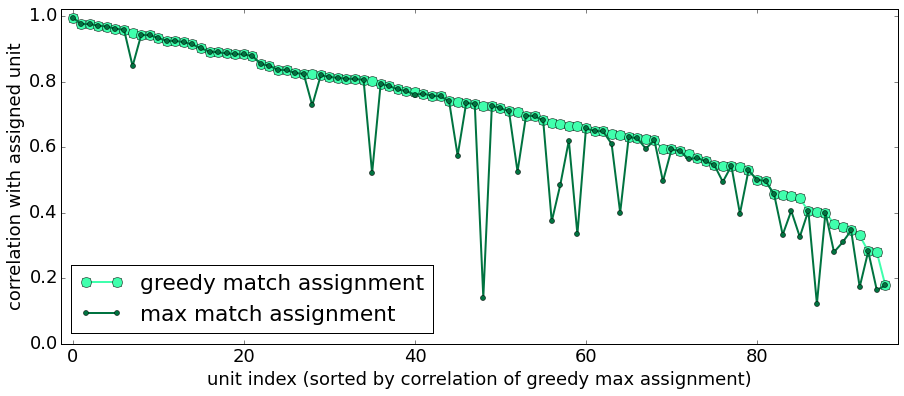

In [98]:
# Conv1 (see Fig 3 in paper)
plot_match_vs_max(l_matches['conv1'], l_xcors['conv1'][net0][net1])

Avg. correlation (greedy matching) 0.55595
Avg. correlation (max matching) 0.50739
Overlapping ratio (when greedy matching and max matching returns the same result): 0.578125


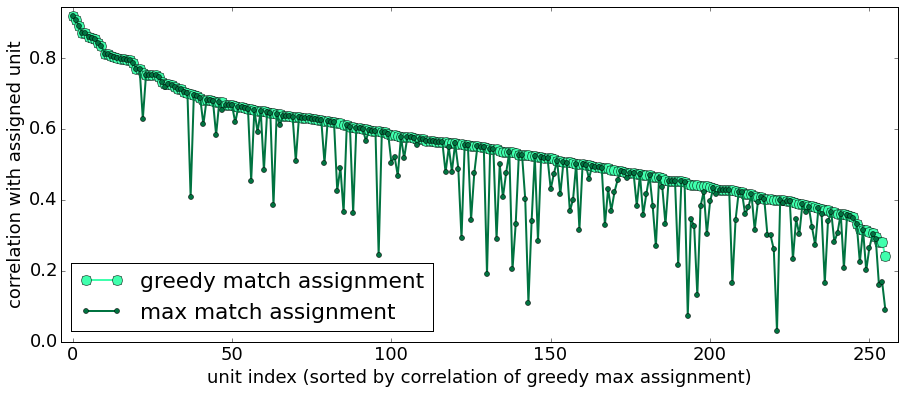

In [93]:
plot_match_vs_max(l_matches['conv2'], l_xcors['conv2'][net0][net1])

Avg. correlation (greedy matching) 0.477509
Avg. correlation (max matching) 0.445778
Overlapping ratio (when greedy matching and max matching returns the same result): 0.6171875


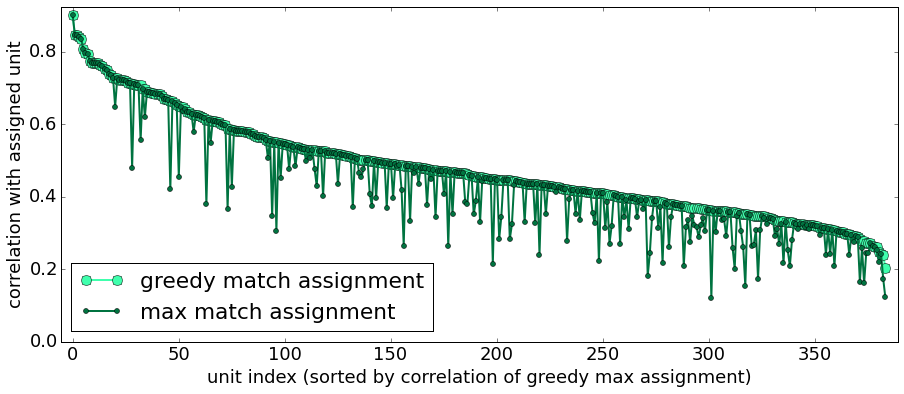

In [95]:
plot_match_vs_max(l_matches['conv3'], l_xcors['conv3'][net0][net1])

Avg. correlation (greedy matching) 0.368536
Avg. correlation (max matching) 0.341896
Overlapping ratio (when greedy matching and max matching returns the same result): 0.580729166667


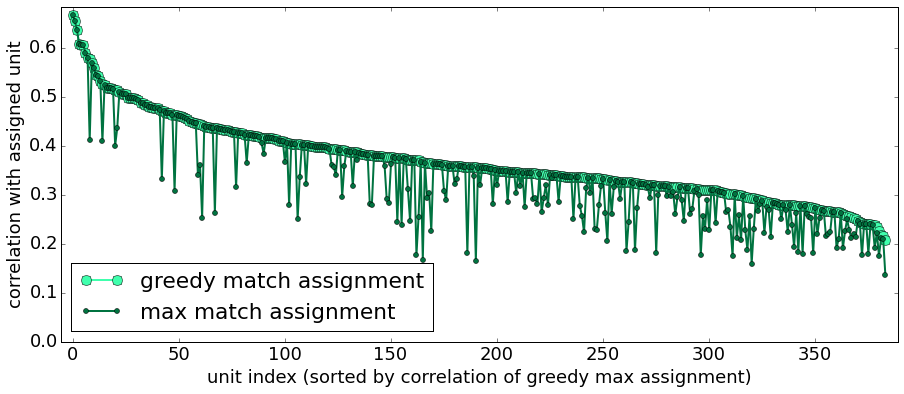

In [96]:
plot_match_vs_max(l_matches['conv4'], l_xcors['conv4'][net0][net1])

Avg. correlation (greedy matching) 0.41557
Avg. correlation (max matching) 0.38489
Overlapping ratio (when greedy matching and max matching returns the same result): 0.64453125


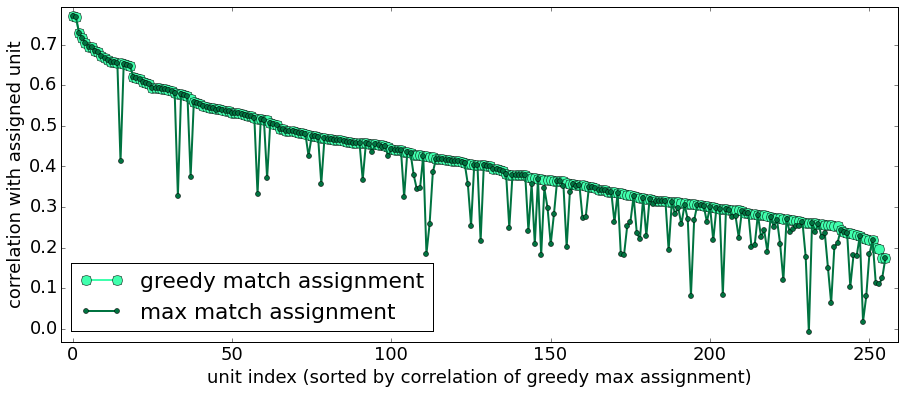

In [97]:
plot_match_vs_max(l_matches['conv5'], l_xcors['conv5'][net0][net1])

In [29]:
def crop_one_patch(vis_unit_concat, which='image'):
    '''Which may be opt, image, or deconv. Opt is not always present though!'''
    ratio = int(round(float(vis_unit_concat.shape[0])/vis_unit_concat.shape[1]))
    assert which in ('opt', 'image', 'deconv')
    assert ratio in (2, 3)
    if which == 'opt':
        assert ratio == 3, 'which = opt requested but no opt result found for this unit. Try image or deconv instead.'

    border = 1
    one_patch_size = vis_unit_concat.shape[1]/3 - border*2
    trim = 0
    #print ratio, border, one_patch_size
    width = vis_unit_concat.shape[1]

    if ratio == 3:
        # opt, im, deconv
        region = dict(opt=0, image=1, deconv=2)[which]
    else:
        # im, deconv
        region = dict(image=0, deconv=1)[which]

    one_patch = vis_unit_concat[width*region + border+trim:(width*region + border-trim+one_patch_size),
                                border+trim:(border-trim+one_patch_size)]
    return one_patch

## The most and least active units
The most active and least active conv1 filters for Net1 – Net4, with average activation values printed above each filter. The most active filters generally respond to low spatial frequencies, and the least active filtered to high spatial frequencies, but the lack of alignment is interesting. (see Fig S.11 in http://arxiv.org/pdf/1511.07543v2.pdf)

In [33]:
def plot_top_bot_few(layer, top = True, fileout=None):
    figsize(20,8)
    fig=gcf()
    #fig.set_facecolor((.5,.5,.5))
    N = 8
    for ii,idx in enumerate(netidxs):
        for jj in range(N):
            subplot(len(netidxs),N,ii*N+jj+1)
            if top:
                unit_idx = l_descending_means[layer][idx][jj]
            else:
                unit_idx = l_descending_means[layer][idx][jj-N]
            imshow(crop_one_patch(l_vis_unit_all[layer][idx][unit_idx]))
            axis('off')
            #title('%g' % int(round(l_means[layer][idx][unit_idx])), fontsize=20)
            title('%.1f' % l_means[layer][idx][unit_idx], fontsize=20)
    subplots_adjust(wspace=0, hspace=.25)
    if fileout:
        savefig(fileout + '.png')
        savefig(fileout + '.pdf')

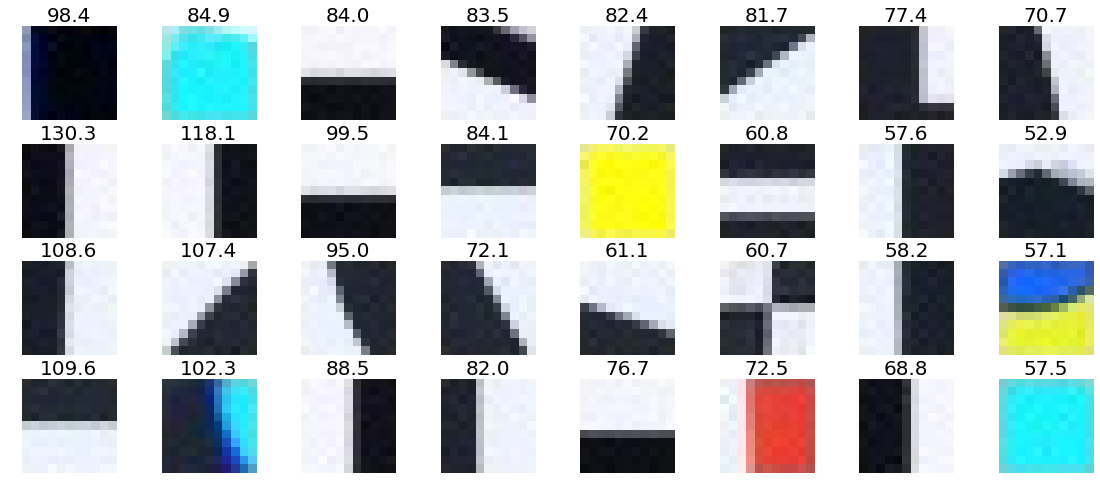

In [36]:
# Conv1, most active filters
plot_top_bot_few('conv1', True)

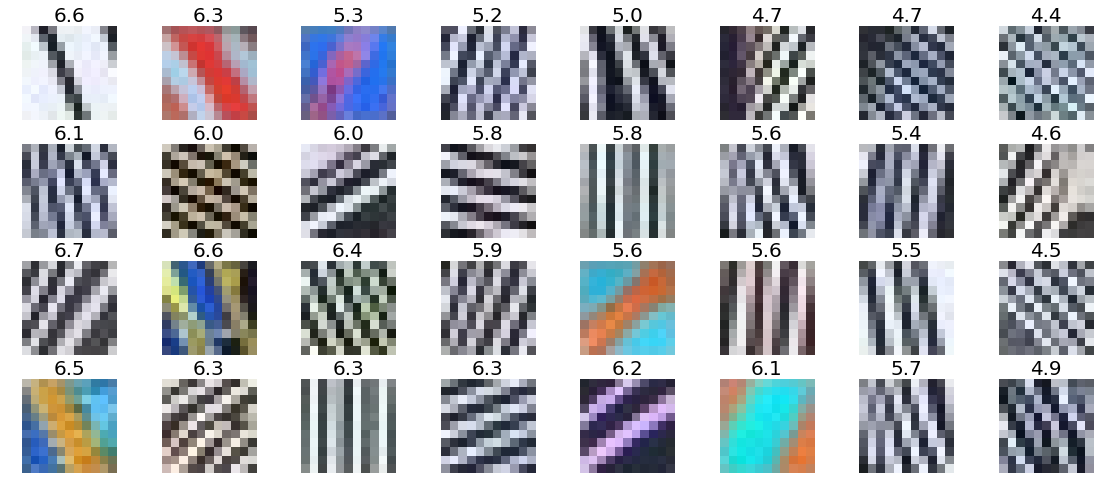

In [37]:
# Conv1, least active filters
plot_top_bot_few('conv1', False)

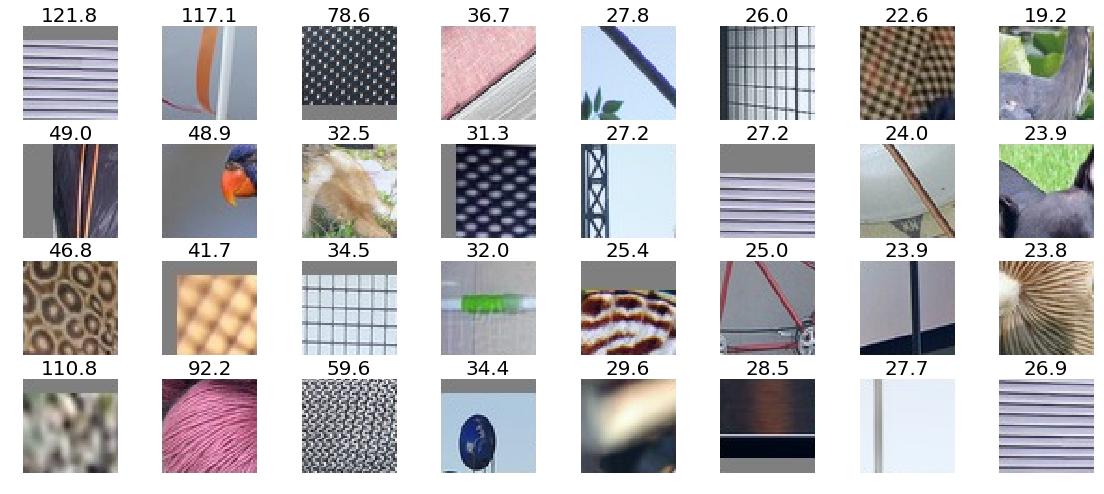

In [38]:
# Conv2, most active filters
plot_top_bot_few('conv2', True)

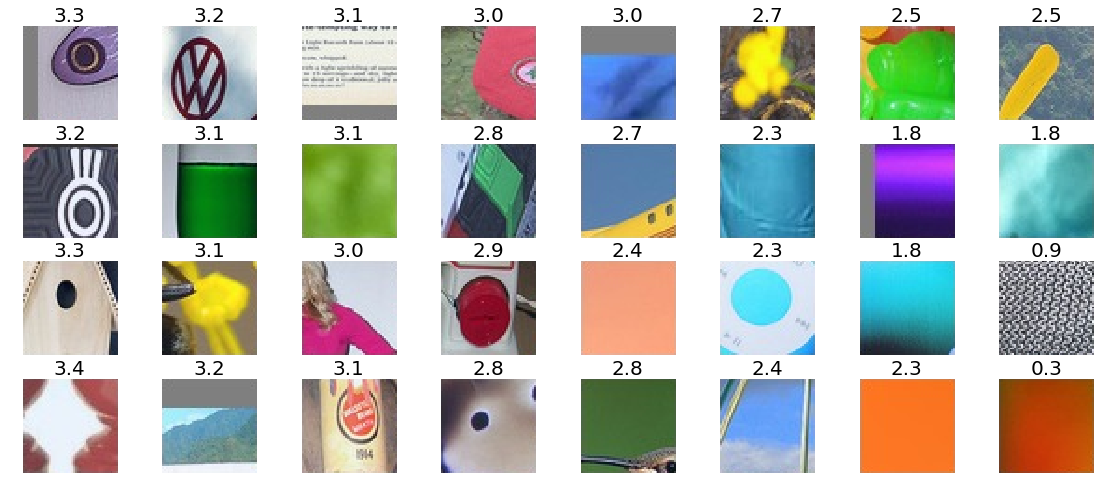

In [39]:
# Conv2, least active filters
plot_top_bot_few('conv2', False)